In [4]:
# https://github.com/zenml-io/zenbytes
# %pip install "zenml[server]"
%pip install "zenml"
!zenml integration install sklearn -y
# %pip install pyparsing==2.4.2  # required for Colab

import IPython

# automatically restart kernel
IPython.Application.instance().kernel.do_shutdown(restart=True)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 43.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.8/209.8 kB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.5/147.5 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.4/95.4 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 525.6/525.6 kB 32.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 237.5/237.5 kB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 593.7/593.7 kB 40.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.1/51.1 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 61.8 MB

{'status': 'ok', 'restart': True}

In [4]:
from kaggle_secrets import UserSecretsClient
user_secrets = UserSecretsClient()
secret_value_0 = user_secrets.get_secret("wandb")
secret_value_1 = user_secrets.get_secret("zenml_password")
secret_value_2 = user_secrets.get_secret("zenml_user")

In [5]:
import os
os.system("zenml connect --url 'https://bsenst-zenml-server.hf.space' --username="+secret_value_2+" --password="+secret_value_1)

Connecting to: 'https://bsenst-zenml-server.hf.space'...
The current global active stack is no longer available. Resetting the active stack to default.
Updated the global store configuration.


0

In [6]:
! zenml status

Unable to find ZenML repository in your current working directory (/kaggle/working) or any parent directories. If you want to use an existing repository which is in a different location, set the environment variable 'ZENML_REPOSITORY_PATH'. If you want to create a new repository, run zenml init.
Running without an active repository root.
Using configuration from: '/root/.config/zenml'
Local store files are located at: '/root/.config/zenml/local_stores'
Connected to a ZenML server: 'https://bsenst-zenml-server.hf.space'
The current user is: 'Benjamin'
The active workspace is: 'default' (global)
The active stack is: 'default' (global)


In [7]:
import numpy as np
from sklearn.base import ClassifierMixin
from sklearn.svm import SVC

from zenml.steps import step, BaseParameters


class SVCTrainerParams(BaseParameters):
    """Trainer params"""
    gamma: float = 0.001


@step
def svc_trainer(
    params: SVCTrainerParams,
    X_train: np.ndarray,
    y_train: np.ndarray,
) -> ClassifierMixin:
    """Train a sklearn SVC classifier."""
    model = SVC(gamma=params.gamma)
    model.fit(X_train, y_train)
    return model

In [8]:
!rm -rf .zen
!zenml init

⠋ Initializing ZenML repository at /kaggle/working.
⠙ Initializing ZenML repository at /kaggle/working.
⠹ Initializing ZenML repository at /kaggle/working.
Setting the repo active workspace to 'default'.
Setting the repo active stack to default.
⠸ Initializing ZenML repository at /kaggle/working.
⠼ Initializing ZenML repository at /kaggle/working.
⠴ Initializing ZenML repository at /kaggle/working.
⠦ Initializing ZenML repository at /kaggle/working.
⠧ Initializing ZenML repository at /kaggle/working.
⠇ Initializing ZenML repository at /kaggle/working.
ZenML repository initialized at /kaggle/working.
⠇ Initializing ZenML repository at /kaggle/working.
⠇ Initializing ZenML repository at /kaggle/working.

The local active stack was initialized to 'default'. This local configuration 
will only take effect when you're running ZenML from the initialized repository 
root, or from a subdirectory. For more information on repositories and 
configurations, please visit 
https://docs.zenml.io/star

In [9]:
import numpy as np
from sklearn.base import ClassifierMixin
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split


def train_test() -> None:
    """Train and test a Scikit-learn SVC classifier on digits"""
    digits = load_digits()
    data = digits.images.reshape((len(digits.images), -1))
    X_train, X_test, y_train, y_test = train_test_split(
        data, digits.target, test_size=0.2, shuffle=False
    )
    model = SVC(gamma=0.001)
    model.fit(X_train, y_train)
    test_acc = model.score(X_test, y_test)
    print(f"Test accuracy: {test_acc}")


train_test()

Test accuracy: 0.9583333333333334


In [10]:
from zenml.steps import step, Output


@step
def importer() -> Output(
    X_train=np.ndarray,
    X_test=np.ndarray,
    y_train=np.ndarray,
    y_test=np.ndarray,
):
    """Load the digits dataset as numpy arrays."""
    digits = load_digits()
    data = digits.images.reshape((len(digits.images), -1))
    X_train, X_test, y_train, y_test = train_test_split(
        data, digits.target, test_size=0.2, shuffle=False
    )
    return X_train, X_test, y_train, y_test


@step
def svc_trainer(
    X_train: np.ndarray,
    y_train: np.ndarray,
) -> ClassifierMixin:
    """Train an sklearn SVC classifier."""
    model = SVC(gamma=0.001)
    model.fit(X_train, y_train)
    return model


@step
def evaluator(
    X_test: np.ndarray,
    y_test: np.ndarray,
    model: ClassifierMixin,
) -> float:
    """Calculate the test set accuracy of an sklearn model."""
    test_acc = model.score(X_test, y_test)
    print(f"Test accuracy: {test_acc}")
    return test_acc

In [11]:
from zenml.pipelines import pipeline


@pipeline
def digits_pipeline(importer, trainer, evaluator):
    """Links all the steps together in a pipeline"""
    X_train, X_test, y_train, y_test = importer()
    model = trainer(X_train=X_train, y_train=y_train)
    evaluator(X_test=X_test, y_test=y_test, model=model)

In [12]:
digits_svc_pipeline = digits_pipeline(
    importer=importer(), trainer=svc_trainer(), evaluator=evaluator()
)
digits_svc_pipeline.run(unlisted=True)

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

Running unlisted pipeline on stack default (caching enabled)
Step importer has started.
Step importer has finished in 1.870s.
Step trainer has started.
Step trainer has finished in 0.244s.
Step evaluator has started.
Test accuracy: 0.9583333333333334
Step evaluator has finished in 0.288s.
Pipeline run digits_pipeline-2023_05_24-19_50_26_735761 has finished in 3.837s.
Dashboard URL: https://bsenst-zenml-server.hf.space/pipelines/all-runs


In [13]:
digits_svc_pipeline.run(unlisted=True)

Running unlisted pipeline on stack default (caching enabled)
Step importer has started.
Using cached version of importer.
Step trainer has started.
Using cached version of trainer.
Step evaluator has started.
Using cached version of evaluator.
Pipeline run digits_pipeline-2023_05_24-19_53_55_353835 has finished in 1.489s.
Dashboard URL: https://bsenst-zenml-server.hf.space/pipelines/all-runs


In [14]:
import numpy as np
from sklearn.base import ClassifierMixin
from sklearn.tree import DecisionTreeClassifier
from zenml.steps import step


@step()
def tree_trainer(
    X_train: np.ndarray,
    y_train: np.ndarray,
) -> ClassifierMixin:
    """Train an sklearn decision tree classifier."""
    model = DecisionTreeClassifier()
    model.fit(X_train, y_train)
    return model


# redefine and rerun our pipeline, this time with tree_trainer()
digits_tree_pipeline = digits_pipeline(
    importer=importer(), trainer=tree_trainer(), evaluator=evaluator()
)
digits_tree_pipeline.run(unlisted=True)

Running unlisted pipeline on stack default (caching enabled)
Step importer has started.
Using cached version of importer.
Step trainer has started.
Step trainer has finished in 0.223s.
Step evaluator has started.
Test accuracy: 0.8083333333333333
Step evaluator has finished in 0.222s.
Pipeline run digits_pipeline-2023_05_24-19_56_42_856596 has finished in 1.827s.
Dashboard URL: https://bsenst-zenml-server.hf.space/pipelines/all-runs


In [16]:
# # Register the MLflow experiment tracker
# !zenml experiment-tracker register mlflow_tracker --flavor=mlflow

# # Create a new stack that includes an MLflow experiment
# !zenml stack register mlflow_exp_tracker_stack -a default -o default -e mlflow_tracker

# Set the new stack as active
!zenml stack set mlflow_exp_tracker_stack

Connected to the ZenML server: 'https://bsenst-zenml-server.hf.space'
Running with active workspace: 'default' (repository)
Active repository stack set to: 'mlflow_exp_tracker_stack'.
⠴ Setting the repository active stack to 'mlflow_exp_tracker_stack'...racker_stack'...


In [17]:
from absl import logging as absl_logging
import warnings

warnings.filterwarnings("ignore")
absl_logging.set_verbosity(-10000)

In [18]:
! zenml status

Using configuration from: '/root/.config/zenml'
Local store files are located at: '/root/.config/zenml/local_stores'
Active repository root: /kaggle/working
Connected to a ZenML server: 'https://bsenst-zenml-server.hf.space'
The current user is: 'Benjamin'
The active workspace is: 'default' (repository)
The active stack is: 'mlflow_exp_tracker_stack' (repository)


In [22]:
# clone zenbytes repo to get source code of previous lessons
!git clone https://github.com/zenml-io/zenbytes.git  # noqa
!mv zenbytes/steps .
!mv zenbytes/pipelines .

Cloning into 'zenbytes'...
remote: Enumerating objects: 856, done.
remote: Counting objects: 100% (206/206), done.
remote: Compressing objects: 100% (119/119), done.
remote: Total 856 (delta 110), reused 158 (delta 85), pack-reused 650
Receiving objects: 100% (856/856), 16.13 MiB | 18.87 MiB/s, done.
Resolving deltas: 100% (465/465), done.


In [23]:
from zenml.environment import Environment

In [24]:
!zenml integration install mlflow wandb -y

import mlflow
import numpy as np
from sklearn.base import ClassifierMixin
from sklearn.svm import SVC
from zenml.steps import step

@step(enable_cache=False, experiment_tracker="mlflow_tracker")
def svc_trainer_mlflow(
    X_train: np.ndarray,
    y_train: np.ndarray,
) -> ClassifierMixin:
    """Train an sklearn SVC classifier and log to MLflow."""
    mlflow.sklearn.autolog()  # log all model hparams and metrics to MLflow
    model = SVC(gamma=1e-3)
    model.fit(X_train, y_train)
    return model

svc_mlflow_pipeline = digits_pipeline(
    importer=importer(),
    trainer=svc_trainer_mlflow(),
    evaluator=evaluator(),
)

⠼ Installing integrations.....


In [25]:
from sklearn.tree import DecisionTreeClassifier

@step(enable_cache=False, experiment_tracker="mlflow_tracker")
def tree_trainer_with_mlflow(
    X_train: np.ndarray,
    y_train: np.ndarray,
) -> ClassifierMixin:
    """Train an sklearn decision tree classifier and log to MLflow."""
    mlflow.sklearn.autolog()  # log all model hparams and metrics to MLflow
    model = DecisionTreeClassifier()
    model.fit(X_train, y_train)
    return model

tree_mlflow_pipeline = digits_pipeline(
    importer=importer(),
    trainer=tree_trainer_with_mlflow(),
    evaluator=evaluator(),
)

In [26]:
svc_mlflow_pipeline.run(unlisted=True)
tree_mlflow_pipeline.run(unlisted=True)

Reloading configuration file /kaggle/working/.zen/config.yaml
Running unlisted pipeline on stack mlflow_exp_tracker_stack (caching enabled)
Step importer has started.
Using cached version of importer.
Step trainer has started.


2023/05/24 20:21:55 INFO mlflow.tracking.fluent: Experiment with name 'digits_pipeline' does not exist. Creating a new experiment.
2023/05/24 20:21:56 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of sklearn. If you encounter errors during autologging, try upgrading / downgrading sklearn to a supported version, or try upgrading MLflow.


Step trainer has finished in 8.578s.
Step evaluator has started.
Test accuracy: 0.9583333333333334
Step evaluator has finished in 0.243s.
Pipeline run digits_pipeline-2023_05_24-20_21_54_937287 has finished in 10.276s.
Dashboard URL: https://bsenst-zenml-server.hf.space/pipelines/all-runs
Running unlisted pipeline on stack mlflow_exp_tracker_stack (caching enabled)
Step importer has started.
Using cached version of importer.
Step trainer has started.


2023/05/24 20:22:11 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of sklearn. If you encounter errors during autologging, try upgrading / downgrading sklearn to a supported version, or try upgrading MLflow.


Step trainer has finished in 4.081s.
Step evaluator has started.
Test accuracy: 0.7944444444444444
Step evaluator has finished in 0.228s.
Pipeline run digits_pipeline-2023_05_24-20_22_10_270204 has finished in 5.776s.
Dashboard URL: https://bsenst-zenml-server.hf.space/pipelines/all-runs


In [27]:
import mlflow
import numpy as np
from sklearn.base import ClassifierMixin
from sklearn.svm import SVC
from zenml.steps import step

@step(enable_cache=False, experiment_tracker="mlflow_tracker")
def svc_trainer_mlflow(
    X_train: np.ndarray,
    y_train: np.ndarray,
) -> ClassifierMixin:
    """Train an sklearn SVC classifier and log to MLflow."""
    mlflow.sklearn.autolog()  # log all model hparams and metrics to MLflow
    model = SVC(gamma=1e-3)
    model.fit(X_train, y_train)
    return model

svc_mlflow_pipeline = digits_pipeline(
    importer=importer(),
    trainer=svc_trainer_mlflow(),
    evaluator=evaluator(),
)

In [28]:
from sklearn.tree import DecisionTreeClassifier

@step(enable_cache=False, experiment_tracker="mlflow_tracker")
def tree_trainer_with_mlflow(
    X_train: np.ndarray,
    y_train: np.ndarray,
) -> ClassifierMixin:
    """Train an sklearn decision tree classifier and log to MLflow."""
    mlflow.sklearn.autolog()  # log all model hparams and metrics to MLflow
    model = DecisionTreeClassifier()
    model.fit(X_train, y_train)
    return model

tree_mlflow_pipeline = digits_pipeline(
    importer=importer(),
    trainer=tree_trainer_with_mlflow(),
    evaluator=evaluator(),
)

In [29]:
svc_mlflow_pipeline.run(unlisted=True)
tree_mlflow_pipeline.run(unlisted=True)

Running unlisted pipeline on stack mlflow_exp_tracker_stack (caching enabled)
Step importer has started.
Using cached version of importer.
Step trainer has started.


2023/05/24 20:22:56 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of sklearn. If you encounter errors during autologging, try upgrading / downgrading sklearn to a supported version, or try upgrading MLflow.


Step trainer has finished in 4.073s.
Step evaluator has started.
Test accuracy: 0.9583333333333334
Step evaluator has finished in 0.243s.
Pipeline run digits_pipeline-2023_05_24-20_22_55_768539 has finished in 5.728s.
Dashboard URL: https://bsenst-zenml-server.hf.space/pipelines/all-runs
Running unlisted pipeline on stack mlflow_exp_tracker_stack (caching enabled)
Step importer has started.
Using cached version of importer.
Step trainer has started.


2023/05/24 20:23:08 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of sklearn. If you encounter errors during autologging, try upgrading / downgrading sklearn to a supported version, or try upgrading MLflow.


Step trainer has finished in 4.087s.
Step evaluator has started.
Test accuracy: 0.8
Step evaluator has finished in 0.228s.
Pipeline run digits_pipeline-2023_05_24-20_23_07_297616 has finished in 5.767s.
Dashboard URL: https://bsenst-zenml-server.hf.space/pipelines/all-runs


In [30]:
! zenml stack list

Connected to the ZenML server: 'https://bsenst-zenml-server.hf.space'
Running with active workspace: 'default' (repository)
⠋ Listing stacks...
┏━━━━━━━━┯━━━━━━━━┯━━━━━━━━┯━━━━━━━━┯━━━━━━━━┯━━━━━━━━┯━━━━━━━┯━━━━━━━━┯━━━━━━━┓
┃        │        │        │        │        │ ARTIFA │ ORCHE │ EXPERI │ MODEL ┃
┃        │ STACK  │ STACK  │        │        │ CT_STO │ STRAT │ MENT_T │ _DEPL ┃
┃ ACTIVE │ NAME   │ ID     │ SHARED │ OWNER  │ RE     │ OR    │ RACKER │ OYER  ┃
┠────────┼────────┼────────┼────────┼────────┼────────┼───────┼────────┼───────┨
┃        │ defaul │ af0af3 │ ➖     │ Benjam │ defaul │ defau │        │       ┃
┃        │ t      │ 67-422 │        │ in     │ t      │ lt    │        │       ┃
┃        │        │ 6-47e8 │        │        │        │       │        │       ┃
┃        │        │ -9345- │        │        │        │       │        │       ┃
┃        │        │ a63e45 │        │        │        │       │        │       ┃
┃        │        │ a0693d │        │        │ 

In [31]:
! zenml stack set mlflow_exp_tracker_stack

Connected to the ZenML server: 'https://bsenst-zenml-server.hf.space'
Running with active workspace: 'default' (repository)
Active repository stack set to: 'mlflow_exp_tracker_stack'.
⠴ Setting the repository active stack to 'mlflow_exp_tracker_stack'...racker_stack'...


In [32]:
from zenml.post_execution import get_unlisted_runs

pipeline_run = get_unlisted_runs()[0]
step = pipeline_run.get_step("trainer")
experiment_tracker_url = step.metadata["experiment_tracker_url"].value

print(experiment_tracker_url)

file:/root/.config/zenml/local_stores/498be34b-aee3-4ef0-afc1-02c8c05ad241/mlruns


In [42]:
WANDB_API_KEY = secret_value_0  # TODO: replace this with your W&B API key
WANDB_ENTITY = "benjamin-senst"  # TODO: replace this with your W&B entity name
WANDB_PROJECT = "zenbytes"  # TODO: replace this with your W&B project name (if you want to log to a specific project)

In [50]:
# Register the W&B experiment tracker
!zenml experiment-tracker register wandb_tracker --flavor=wandb --api_key={WANDB_API_KEY} --entity={WANDB_ENTITY} --project_name={WANDB_PROJECT}

# Create a new stack that includes a W&B experiment tracker
!zenml stack register wandb_stack -a default -o default -e wandb_tracker

# Set the new stack as active
!zenml stack set wandb_stack

Connected to the ZenML server: 'https://bsenst-zenml-server.hf.space'
Running with active workspace: 'default' (repository)
Running with active stack: 'wandb_stack_2' (repository)
You specified a plain-text value for the sensitive attribute api_key for a WandbExperimentTrackerConfig stack component. This is currently only a warning, but future versions of ZenML will require you to pass in sensitive information as secrets. Check out the documentation on how to configure your stack components with secrets here: https://docs.zenml.io/starter-guide/production-fundamentals/secrets-management
⠋ Registering experiment tracker 'wandb_tracker'...
⠙ Registering experiment tracker 'wandb_tracker'...
⠹ Registering experiment tracker 'wandb_tracker'...
⠸ Registering experiment tracker 'wandb_tracker'...
⠼ Registering experiment tracker 'wandb_tracker'...
⠴ Registering experiment tracker 'wandb_tracker'...
Successfully registered experiment_tracker `wandb_tracker`.
⠴ Registering experiment tracker '

In [51]:
import numpy as np
from sklearn.base import ClassifierMixin
from sklearn.svm import SVC
import wandb
from zenml.steps import step

from pipelines.digits_pipeline import digits_pipeline
from steps.importer import importer


@step(enable_cache=False, experiment_tracker="wandb_tracker")
def svc_trainer_wandb(
    X_train: np.ndarray,
    y_train: np.ndarray,
) -> ClassifierMixin:
    """Train an sklearn SVC classifier and log to W&B."""
    gamma = 1e-3
    wandb.log({"gamma": gamma})  # log gamma hparam to wandb
    model = SVC(gamma=gamma)
    model.fit(X_train, y_train)
    return model

@step(enable_cache=False, experiment_tracker="wandb_tracker")
def evaluator_wandb(
    X_test: np.ndarray,
    y_test: np.ndarray,
    model: ClassifierMixin,
) -> float:
    """Calculate the accuracy on the test set and log to W&B."""
    test_acc = model.score(X_test, y_test)
    wandb.log({"test acc": test_acc})  # log test_acc to wandb
    print(f"Test accuracy: {test_acc}")
    return test_acc

svc_wandb_pipeline = digits_pipeline(
    importer=importer(),
    trainer=svc_trainer_wandb(),
    evaluator=evaluator_wandb(),
)

In [52]:
svc_wandb_pipeline.run(unlisted=True, enable_cache=False)

Reloading configuration file /kaggle/working/.zen/config.yaml
Running unlisted pipeline on stack wandb_stack (caching disabled)
Step importer has started.
Step importer has finished in 1.695s.
Step trainer has started.
Initializing wandb with entity benjamin-senst, project name: zenbytes, run_name: digits_pipeline-2023_05_24-20_45_27_541088_svc_trainer_wandb.


wandb: ERROR Control-C detected -- Run data was not synced


Step trainer has finished in 6m49s.
Step evaluator has started.
Initializing wandb with entity benjamin-senst, project name: zenbytes, run_name: digits_pipeline-2023_05_24-20_45_27_541088_evaluator_wandb.


Failed to run step evaluator.


Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/wandb/sdk/wandb_init.py", line 1150, in init
    run = wi.init()
  File "/opt/conda/lib/python3.10/site-packages/wandb/sdk/wandb_init.py", line 769, in init
    raise error
wandb.errors.CommError: Run initialization has timed out after 60.0 sec. 
Please refer to the documentation for additional information: https://docs.wandb.ai/guides/track/tracking-faq#initstarterror-error-communicating-with-wandb-process-

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/wandb/sdk/wandb_init.py", line 1158, in init
    getcaller()
  File "/opt/conda/lib/python3.10/site-packages/wandb/sdk/wandb_init.py", line 836, in getcaller
    src, line, func, stack = logger.findCaller(stack_info=True)
  File "/root/.local/lib/python3.10/site-packages/log.py", line 42, in findCaller
    sio = io.StringIO()
NameError: name 'io' is 

Pipeline run digits_pipeline-2023_05_24-20_45_27_541088 failed.


╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ /opt/conda/lib/python3.10/site-packages/wandb/sdk/wandb_init.py:1150 in init                     │
│                                                                                                  │
│   1147 │   │   assert wi.settings                                                                │
│   1148 │   │   except_exit = wi.settings._except_exit                                            │
│   1149 │   │   try:                                                                              │
│ ❱ 1150 │   │   │   run = wi.init()                                                               │
│   1151 │   │   │   except_exit = wi.settings._except_exit                                        │
│   1152 │   │   except (KeyboardInterrupt, Exception) as e:                                       │
│   1153 │   │   │   if not isinstance(e, KeyboardInterrupt):                                      │
│                                                                                                  │
│ /opt/conda/lib/python3.10/site-packages/wandb/sdk/wandb_init.py:769 in init                      │
│                                                                                                  │
│    766 │   │   │   │   │   # we don't need to do console cleanup at this point                   │
│    767 │   │   │   │   │   backend.cleanup()                                                     │
│    768 │   │   │   │   │   self.teardown()                                                       │
│ ❱  769 │   │   │   │   raise error                                                               │
│    770 │   │   │                                                                                 │
│    771 │   │   │   assert run_result is not None  # for mypy                                     │
│    772                                                                                           │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
CommError: Run initialization has timed out after 60.0 sec. 
Please refer to the documentation for additional information: 
https://docs.wandb.ai/guides/track/tracking-faq#initstarterror-error-communicating-with-wandb-process-

During handling of the above exception, another exception occurred:

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ /opt/conda/lib/python3.10/site-packages/wandb/sdk/wandb_init.py:1158 in init                     │
│                                                                                                  │
│   1155 │   │   │   if not (                                                                      │
│   1156 │   │   │   │   wandb.wandb_agent._is_running() and isinstance(e, KeyboardInterrupt)      │
│   1157 │   │   │   ):                                                                            │
│ ❱ 1158 │   │   │   │   getcaller()                                                               │
│   1159 │   │   │   assert logger                                                                 │
│   1160 │   │   │   if wi.settings.problem == "fatal":                                            │
│   1161 │   │   │   │   raise                                                                     │
│                                                                                                  │
│ /opt/conda/lib/python3.10/site-packages/wandb/sdk/wandb_init.py:836 in getcaller                 │
│                                                                                                  │
│    833 def getcaller() -> None:                                                                  │
│    834 │   if not logger:                                                                        │
│    835 │   │   return None                                       

In [53]:
trainer_step = get_unlisted_runs()[0].get_step("trainer")
experiment_tracker_url = trainer_step.metadata["experiment_tracker_url"].value
print(experiment_tracker_url)

https://wandb.ai/benjamin-senst/zenbytes/runs/1tjmee0m


In [54]:
import wandb

# 1: Define objective/training function
def objective(config):
    score = config.x ** 3 + config.y
    return score

def main():
    wandb.init(project='my-first-sweep')
    score = objective(wandb.config)
    wandb.log({'score': score})

# 2: Define the search space
sweep_configuration = {
    'method': 'random',
    'metric': {'goal': 'minimize', 'name': 'score'},
    'parameters': 
    {
        'x': {'max': 0.1, 'min': 0.01},
        'y': {'values': [1, 3, 7]},
     }
}

# 3: Start the sweep
sweep_id = wandb.sweep(sweep=sweep_configuration, project='my-first-sweep')
wandb.agent(sweep_id, function=main, count=10)

Create sweep with ID: nqayrvtl
Sweep URL: https://wandb.ai/benjamin-senst/my-first-sweep/sweeps/nqayrvtl


wandb: Ctrl + C detected. Stopping sweep.


In [55]:
from zenml.integrations.mlflow.steps import (
    MLFlowDeployerParameters,
    mlflow_model_deployer_step
)
from zenml.pipelines import pipeline
from zenml.steps import step


@step
def deployment_trigger(test_acc: float) -> bool:
    """Only deploy if the test accuracy > 90%."""
    return test_acc > 0.9


@pipeline(enable_cache=False)
def train_evaluate_deploy_pipeline(
    importer,
    trainer,
    evaluator,
    deployment_trigger,
    model_deployer,
):
    """Train and deploy a model with MLflow."""
    X_train, X_test, y_train, y_test = importer()
    model = trainer(X_train=X_train, y_train=y_train)
    test_acc = evaluator(X_test=X_test, y_test=y_test, model=model)
    deployment_decision = deployment_trigger(test_acc)  # new
    model_deployer(deployment_decision, model)  # new


mlflow_pipeline = train_evaluate_deploy_pipeline(
    importer=importer(),
    trainer=svc_trainer_mlflow(),
    evaluator=evaluator(),
    deployment_trigger=deployment_trigger(),  # new
    model_deployer=mlflow_model_deployer_step(
        MLFlowDeployerParameters(timeout=20)
    ),  # new
)

In [56]:
# Define MLflow experiment tracker from last lesson
!zenml experiment-tracker register mlflow_tracker_2 --flavor=mlflow

# Register the MLflow model deployer
!zenml model-deployer register mlflow_2 --flavor=mlflow

# Create a new stack with MLflow components
!zenml stack register mlflow_stack_2 -a default -o default -d mlflow -e mlflow_tracker

# Set the new stack as active
!zenml stack set mlflow_stack_2

Connected to the ZenML server: 'https://bsenst-zenml-server.hf.space'
Running with active workspace: 'default' (repository)
Running with active stack: 'wandb_stack' (repository)
You are configuring a stack component that is using local resources while connected to a remote ZenML server. The stack component may not be usable from other hosts or by other users. You should consider using a non-local stack component alternative instead.
⠋ Registering experiment tracker 'mlflow_tracker_2'...
⠙ Registering experiment tracker 'mlflow_tracker_2'...
⠹ Registering experiment tracker 'mlflow_tracker_2'...
⠸ Registering experiment tracker 'mlflow_tracker_2'...
⠼ Registering experiment tracker 'mlflow_tracker_2'...
⠴ Registering experiment tracker 'mlflow_tracker_2'...
Successfully registered experiment_tracker `mlflow_tracker_2`.
⠦ Registering experiment tracker 'mlflow_tracker_2'...
⠦ Registering experiment tracker 'mlflow_tracker_2'...

Connected to the ZenML server: 'https://bsenst-zenml-server

In [57]:
mlflow_pipeline.run(unlisted=True)

Reloading configuration file /kaggle/working/.zen/config.yaml
Running unlisted pipeline on stack mlflow_stack_2 (caching disabled)
Step importer has started.
Step importer has finished in 1.784s.
Step trainer has started.


2023/05/24 20:57:10 INFO mlflow.tracking.fluent: Experiment with name 'train_evaluate_deploy_pipeline' does not exist. Creating a new experiment.
2023/05/24 20:57:10 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of sklearn. If you encounter errors during autologging, try upgrading / downgrading sklearn to a supported version, or try upgrading MLflow.


Step trainer has finished in 4.644s.
Step evaluator has started.
Test accuracy: 0.9583333333333334
Step evaluator has finished in 0.261s.
Step deployment_trigger has started.
Step deployment_trigger has finished in 0.232s.
Step model_deployer has started.


Output()

Created a new MLflow deployment service: MLFlowDeploymentService[9dd74827-1599-41dd-a20f-5e4b3297b9e9] (type: model-serving, flavor: mlflow)
MLflow deployment service started and reachable at:
    http://127.0.0.1:8000/invocations

Step model_deployer has finished in 22.061s.
Pipeline run train_evaluate_deploy_pipeline-2023_05_24-20_57_07_356921 has finished in 31.731s.
Dashboard URL: https://bsenst-zenml-server.hf.space/pipelines/all-runs


In [58]:
!zenml model-deployer models list

Connected to the ZenML server: 'https://bsenst-zenml-server.hf.space'
Running with active workspace: 'default' (repository)
Running with active stack: 'mlflow_stack_2' (repository)
┏━━━━━━━━┯━━━━━━━━━━━━━━━━━━┯━━━━━━━━━━━━━━━━━━┯━━━━━━━━━━━━━━━━━━┯━━━━━━━━━━━━┓
┃        │                  │                  │ PIPELINE_STEP_NA │            ┃
┃ STATUS │ UUID             │ PIPELINE_NAME    │ ME               │ MODEL_NAME ┃
┠────────┼──────────────────┼──────────────────┼──────────────────┼────────────┨
┃   ✅   │ 9dd74827-1599-41 │ train_evaluate_d │ model_deployer   │ model      ┃
┃        │ dd-a20f-5e4b3297 │ eploy_pipeline   │                  │            ┃
┃        │ b9e9             │                  │                  │            ┃
┗━━━━━━━━┷━━━━━━━━━━━━━━━━━━┷━━━━━━━━━━━━━━━━━━┷━━━━━━━━━━━━━━━━━━┷━━━━━━━━━━━━┛


In [59]:
from zenml.post_execution import get_unlisted_runs

last_run = get_unlisted_runs()[0]
deployer_step = last_run.get_step("model_deployer")
deployed_model_url = deployer_step.metadata["deployed_model_url"].value
print(deployed_model_url)

http://127.0.0.1:8000/invocations


In [60]:
from zenml.client import Client

client = Client()
model_deployer = client.active_stack.model_deployer
services = model_deployer.find_model_server(
    pipeline_name="train_evaluate_deploy_pipeline",
    pipeline_step_name="model_deployer",
    running=True,
)
service = services[0]
service.check_status()

Reloading configuration file /kaggle/working/.zen/config.yaml


(<ServiceState.ACTIVE: 'active'>, '')

In [61]:
last_run = get_unlisted_runs()[0]
X_test = last_run.steps[0].outputs["X_test"].read()
y_test = last_run.steps[0].outputs["y_test"].read()

Model predicted [2], true label was 2


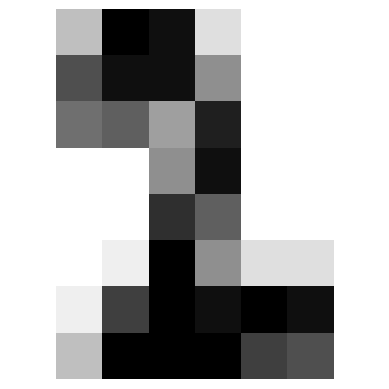

In [62]:
import matplotlib.pyplot as plt

plt.axis("off")
plt.imshow(X_test[0].reshape(8, 8), cmap=plt.cm.gray_r, interpolation="nearest")
pred0 = service.predict(X_test[0:1])
print(f"Model predicted {pred0}, true label was {y_test[0]}")

In [63]:
!rm -rf .zen
!zenml init
!zenml experiment-tracker register mlflow_tracker_3 --flavor=mlflow
!zenml model-deployer register mlflow_3 --flavor=mlflow
!zenml stack register mlflow_stack_3 -a default -o default -d mlflow_3 -e mlflow_tracker_3
!zenml stack set mlflow_stack_3

⠋ Initializing ZenML repository at /kaggle/working.
⠙ Initializing ZenML repository at /kaggle/working.
⠹ Initializing ZenML repository at /kaggle/working.
Setting the repo active workspace to 'default'.
Setting the repo active stack to default.
⠸ Initializing ZenML repository at /kaggle/working.
⠼ Initializing ZenML repository at /kaggle/working.
⠴ Initializing ZenML repository at /kaggle/working.
⠦ Initializing ZenML repository at /kaggle/working.
⠧ Initializing ZenML repository at /kaggle/working.
ZenML repository initialized at /kaggle/working.
⠧ Initializing ZenML repository at /kaggle/working.
⠧ Initializing ZenML repository at /kaggle/working.

The local active stack was initialized to 'default'. This local configuration 
will only take effect when you're running ZenML from the initialized repository 
root, or from a subdirectory. For more information on repositories and 
configurations, please visit 
https://docs.zenml.io/starter-guide/stacks/managing-stacks.
Connected to the Z

In [65]:
!zenml stack set mlflow_stack

Connected to the ZenML server: 'https://bsenst-zenml-server.hf.space'
Running with active workspace: 'default' (repository)
Active repository stack set to: 'mlflow_stack'.
⠴ Setting the repository active stack to 'mlflow_stack'...mlflow_stack'...


In [66]:
from zenml.integrations.mlflow.steps import (
    MLFlowDeployerParameters, 
    mlflow_model_deployer_step
)

# from pipelines.training_pipeline import train_evaluate_deploy_pipeline
from steps.deployment_trigger import deployment_trigger
from steps.evaluator import evaluator
from steps.importer import importer
from steps.mlflow_trainer import svc_trainer_mlflow

train_evaluate_deploy_pipeline(
    importer=importer(),
    trainer=svc_trainer_mlflow(),
    evaluator=evaluator(),
    deployment_trigger=deployment_trigger(),
    model_deployer=mlflow_model_deployer_step(
        MLFlowDeployerParameters(timeout=20)
    ),  # new
).run(unlisted=True)

Reloading configuration file /kaggle/working/.zen/config.yaml
Running unlisted pipeline on stack mlflow_stack (caching disabled)
Step importer has started.
Step importer has finished in 1.738s.
Step trainer has started.


2023/05/24 21:04:22 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of sklearn. If you encounter errors during autologging, try upgrading / downgrading sklearn to a supported version, or try upgrading MLflow.


Step trainer has finished in 4.376s.
Step evaluator has started.
Test accuracy: 0.9583333333333334
Step evaluator has finished in 0.260s.
Step deployment_trigger has started.
Step deployment_trigger has finished in 0.236s.
Step model_deployer has started.


Updating an existing MLflow deployment service: MLFlowDeploymentService[9dd74827-1599-41dd-a20f-5e4b3297b9e9] (type: model-serving, flavor: mlflow)


Output()

MLflow deployment service started and reachable at:
    http://127.0.0.1:8000/invocations

Step model_deployer has finished in 21.817s.
Pipeline run train_evaluate_deploy_pipeline-2023_05_24-21_04_19_263974 has finished in 31.211s.
Dashboard URL: https://bsenst-zenml-server.hf.space/pipelines/all-runs


In [67]:
from zenml.pipelines import pipeline


@pipeline
def inference_pipeline(
    inference_data_loader,
    prediction_service_loader,
    predictor,
):
    """Basic inference pipeline."""
    inference_data = inference_data_loader()
    model_deployment_service = prediction_service_loader()
    predictor(model_deployment_service, inference_data)

In [68]:
import numpy as np
from zenml.steps import step


@step
def inference_data_loader() -> np.ndarray:
    """Load some inference data."""
    return np.random.rand(1, 64)  # flattened 8x8 random noise image

In [69]:
from zenml.services import BaseService
from zenml.client import Client
from zenml.steps import step, Output


@step(enable_cache=False)
def prediction_service_loader() -> BaseService:
    """Load the model service of our train_evaluate_deploy_pipeline."""
    client = Client()
    model_deployer = client.active_stack.model_deployer
    services = model_deployer.find_model_server(
        pipeline_name="train_evaluate_deploy_pipeline",
        pipeline_step_name="model_deployer",
        running=True,
    )
    service = services[0]
    return service

In [70]:
@step
def predictor(
    service: BaseService,
    data: np.ndarray,
) -> Output(predictions=list):
    """Run a inference request against a prediction service"""
    service.start(timeout=10)  # should be a NOP if already started
    prediction = service.predict(data)
    prediction = prediction.argmax(axis=-1)
    print(f"Prediction is: {[prediction.tolist()]}")
    return [prediction.tolist()]

In [71]:
# Initialize an inference pipeline run
my_inference_pipeline = inference_pipeline(
    inference_data_loader=inference_data_loader(),
    prediction_service_loader=prediction_service_loader(),
    predictor=predictor(),
)

my_inference_pipeline.run()

Registered pipeline inference_pipeline (version 1).
Running pipeline inference_pipeline on stack mlflow_stack (caching enabled)
Step inference_data_loader has started.
Step inference_data_loader has finished in 0.435s.
Step prediction_service_loader has started.
Step prediction_service_loader has finished in 0.382s.
Step predictor has started.


Prediction is: [0]
Step predictor has finished in 0.247s.
Pipeline run inference_pipeline-2023_05_24-21_06_25_400481 has finished in 2.376s.
Dashboard URL: https://bsenst-zenml-server.hf.space/workspaces/default/pipelines/ee6096a3-3848-4d6e-8ad7-d1a0a78067df/runs


In [72]:
from steps.evaluator import evaluator
from steps.importer import importer
from steps.sklearn_trainer import svc_trainer

In [73]:
from zenml.pipelines import pipeline


@pipeline(enable_cache=False)
def digits_pipeline_with_train_test_checks(
    importer,
    trainer,
    evaluator,
    get_reference_data,
    skew_detector,
):
    """Digits pipeline with train-test check."""
    X_train, X_test, y_train, y_test = importer()
    model = trainer(X_train=X_train, y_train=y_train)
    evaluator(X_test=X_test, y_test=y_test, model=model)
    reference, comparison = get_reference_data(X_train, X_test)
    skew_detector(reference, comparison)

In [117]:
! pip uninstall evidently -y
! zenml integration install evidently -y

from zenml.integrations.evidently.steps import (
    EvidentlyReportParameters,
    evidently_report_step,
)
from zenml.integrations.evidently.metrics import EvidentlyMetricConfig

# configure the Evidently step
evidently_report_params = EvidentlyReportParameters(
    metrics=[EvidentlyMetricConfig.metric("DatasetDriftMetric")],
)

Found existing installation: evidently 0.2.2
Uninstalling evidently-0.2.2:
  Successfully uninstalled evidently-0.2.2
⠸ Installing integrations...ons...


╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ /tmp/ipykernel_127/1775554189.py:4 in <module>                                                   │
│                                                                                                  │
│ [Errno 2] No such file or directory: '/tmp/ipykernel_127/1775554189.py'                          │
│                                                                                                  │
│ /opt/conda/lib/python3.10/site-packages/zenml/integrations/evidently/steps/__init__.py:17 in     │
│ <module>                                                                                         │
│                                                                                                  │
│   14 """Initialization of the Evidently Standard Steps."""                                       │
│   15                                                                                             │
│   16 from zenml.integrations.evidently.column_mapping import EvidentlyColumnMapping              │
│ ❱ 17 from zenml.integrations.evidently.steps.evidently_report import (                           │
│   18 │   EvidentlyReportParameters,                                                              │
│   19 │   EvidentlyReportStep,                                                                    │
│   20 │   EvidentlySingleDatasetReportStep,                                                       │
│                                                                                                  │
│ /opt/conda/lib/python3.10/site-packages/zenml/integrations/evidently/steps/evidently_report.py:2 │
│ 2 in <module>                                                                                    │
│                                                                                                  │
│    19 from pydantic import Field, root_validator                                                 │
│    20                                                                                            │
│    21 from zenml.integrations.evidently.column_mapping import EvidentlyColumnMapping             │
│ ❱  22 from zenml.integrations.evidently.data_validators import EvidentlyDataValidator            │
│    23 from zenml.integrations.evidently.metrics import EvidentlyMetricConfig                     │
│    24 from zenml.steps import Output                                                             │
│    25 from zenml.steps.base_parameters import BaseParameters                                     │
│                                                                                                  │
│ /opt/conda/lib/python3.10/site-packages/zenml/integrations/evidently/data_validators/__init__.py │
│ :16 in <module>                                                                                  │
│                                                                                                  │
│   13 #  permissions and limitations under the License.                                           │
│   14 """Initialization of the Evidently data validator for ZenML."""                             │
│   15                                                                                             │
│ ❱ 16 from zenml.integrations.evidently.data_validators.evidently_data_validator import (         │
│   17 │   EvidentlyDataValidator,                                                                 │
│   18 )                                                                                           │
│   19                                                                                             │
│                                                                                                  │
│ /opt/conda/lib/python3.10/site-packages/zenml/integrations/evidently/data_validators/evidently_d │
│ ata_validator.py:54 in <module>                            

In [118]:
import numpy as np
import pandas as pd
from zenml.steps import step, Output


@step
def get_reference_data(
    X_train: np.ndarray,
    X_test: np.ndarray,
) -> Output(reference=pd.DataFrame, comparison=pd.DataFrame):
    """Convert numpy data to pandas for distribution difference calculation."""
    columns = [str(x) for x in list(range(X_train.shape[1]))]
    X_train = pd.DataFrame(X_test, columns=columns)
    X_test = pd.DataFrame(X_train, columns=columns)
    return X_train, X_test

In [92]:
!zenml data-validator register evidently_validator --flavor=evidently
!zenml stack register evidently_stack -a default -o default -dv evidently_validator
!zenml stack set evidently_stack

Connected to the ZenML server: 'https://bsenst-zenml-server.hf.space'
Running with active workspace: 'default' (repository)
Running with active stack: 'mlflow_stack' (repository)
⠋ Registering data validator 'evidently_validator'...
⠙ Registering data validator 'evidently_validator'...
⠹ Registering data validator 'evidently_validator'...
⠸ Registering data validator 'evidently_validator'...
⠼ Registering data validator 'evidently_validator'...
Successfully registered data_validator `evidently_validator`.
⠼ Registering data validator 'evidently_validator'...
⠼ Registering data validator 'evidently_validator'...

Connected to the ZenML server: 'https://bsenst-zenml-server.hf.space'
Running with active workspace: 'default' (repository)
⠋ Registering stack 'evidently_stack'...
⠙ Registering stack 'evidently_stack'...
⠹ Registering stack 'evidently_stack'...
⠸ Registering stack 'evidently_stack'...
⠼ Registering stack 'evidently_stack'...
⠴ Registering stack 'evidently_stack'...
⠦ Register

In [119]:
evidently_pipeline = digits_pipeline_with_train_test_checks(
    importer=importer(),
    trainer=svc_trainer(),
    evaluator=evaluator(),
    get_reference_data=get_reference_data(),
    skew_detector=evidently_report_step(
        step_name="evidently_skew_detector",
        params=evidently_report_params,
    ),
)
evidently_pipeline.run(unlisted=True)

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ /tmp/ipykernel_127/4034205871.py:6 in <module>                                                   │
│                                                                                                  │
│ [Errno 2] No such file or directory: '/tmp/ipykernel_127/4034205871.py'                          │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
NameError: name 'evidently_report_step' is not defined